# lab 1

In [33]:
import os
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2


In [34]:
def bw_0(filename):
    img = mpimg.imread(filename)
    arr = img.mean(axis=-1)
    plt.imshow(arr, cmap=plt.get_cmap('gray'))
    plt.show()
    return img

In [35]:
def bw(filename):
    
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    thresholdValue = np.mean(image)
    xDim, yDim = image.shape

    for i in range(xDim):
        for j in range(yDim):
            if image[i][j] > thresholdValue:
                image[i][j] = 255  
            else:
                image[i][j] = 0    

    # cv2.imshow('Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
   
    plt.imshow(image, cmap='gray')
    plt.show()
    return image



**Otsu’s method**  is a popular technique employed for image thresholding. It separates an image into two classes, foreground, and background, based on the grayscale intensity values of its pixels.

- Furthermore, Otsu’s method uses the grayscale histogram of an image to detect an optimal threshold value that separates two regions with maximum inter-class variance.

\begin{equation*} H(i) = \sum_{x=1}^{M}\sum_{y=1}^{N} [I(x,y) = i] \end{equation*}  





- Where M and N represent the width and height of the image, respectively, and [I(x,y) = i] is a function that returns one (1) if the pixel at position (x,y) has an intensity value of i, and zero (0) otherwise.



q1 and q2 are parts of pixels which belong to two classes (background and object), which are determined based on the threshold.
mean1 and mean2 are the mean brightness values of pixels for each class.
var1 and var2 are brightness dispersions for each class.


In [36]:
def otsu(image):
    height, width = image.shape
    hist = np.zeros(256)

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            hist[pixel_value] += 1

    total_pixels = height * width
    p = hist / total_pixels

    max_variance = 0
    optimal_threshold = 0

    for a in range(256):
        q1 = sum(p[:a])
        q2 = sum(p[a:])

        if q1 == 0 or q2 == 0:
            continue

        mean1 = np.sum(np.arange(a) * p[:a]) / q1
        mean2 = np.sum(np.arange(a, 256) * p[a:]) / q2

        var1 = np.sum(((np.arange(a) - mean1) ** 2) * p[:a]) / q1
        var2 = np.sum(((np.arange(a, 256) - mean2) ** 2) * p[a:]) / q2

        result = q1 * var1 + q2 * var2

        if result > max_variance:
            max_variance = result
            optimal_threshold = a
            
    return optimal_threshold



In [37]:

def objectImage(image2, filename):

    original_image = cv2.imread(filename)
    optimal_threshold = otsu(image2)

    _, mask = cv2.threshold(image2, optimal_threshold, 255, cv2.THRESH_BINARY)

    inverted_mask = cv2.bitwise_not(mask)

    image_with_alpha = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)

    image_with_alpha[:, :, 3] = inverted_mask

    output_filename = 'object_' + filename.split('/')[-1] 
    path = 'output/' + output_filename  

    cv2.imwrite(path, image_with_alpha)
    print(f"Изображение сохранено в : {path}")
    
    cv2.imshow('Mask', mask)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


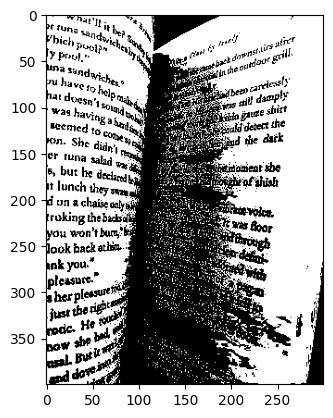

Изображение сохранено в : output/object_text_foto_lab1.png


In [38]:
filename = "before/text_foto_lab1.png"
bw_image = bw(filename)

objectImage(bw_image, filename)
